In [1]:
import os
import pandas as pd
import numpy as np
import time

In [2]:
df=pd.read_csv(r'data/AURN_data_download/Westminster/MY1.csv',parse_dates=['date'],index_col='date')

In [3]:
df

,O3,NO,NO2,NOXasNO2,SO2,CO,PM10,NV10,V10,PM2.5,...,AP10,AT2.5,AP2.5,site,code,latitude,longitude,location_type,Ox,NOx
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1.72961,78.38595,45.77784,165.96796,4.75424,NaN,69.0,60.0,9.0,58.1,...,1026.2,4.7,1025.2,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,23.960024,83.832703
2020-01-01 01:00:00,1.92918,88.61587,52.64325,188.51903,4.84394,0.397528,45.0,38.4,6.6,43.2,...,1026.2,4.6,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,27.524407,95.223555
2020-01-01 02:00:00,1.99570,70.02935,44.76870,152.14554,3.09474,0.346417,46.2,39.1,7.1,43.0,...,1026.2,4.9,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,23.579103,76.850791
2020-01-01 03:00:00,2.04559,67.58589,40.20699,143.83725,2.96019,0.335059,45.1,38.8,6.3,42.8,...,1026.2,4.6,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,21.299094,72.654172
2020-01-01 04:00:00,2.99355,72.03298,47.26010,157.70912,3.83478,0.349257,40.8,34.2,6.6,36.8,...,1026.2,4.2,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.320553,79.661030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,20.70539,12.46950,30.47461,49.59424,1.12164,0.129904,13.9,11.8,2.1,11.7,...,1002.9,-0.1,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.415693,25.050618
2020-12-31 20:00:00,24.14797,9.65279,26.51175,41.31249,1.12164,0.094180,14.6,11.3,3.3,11.0,...,1002.9,0.6,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.080442,20.867401
2020-12-31 21:00:00,25.69464,12.46950,28.45232,47.57196,1.36199,0.087685,16.6,13.0,3.6,15.3,...,1003.9,0.8,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,26.809326,24.029142


In [4]:
era=pd.read_csv(r'data/era5_data/MY1_era.csv',parse_dates=['date'],index_col='date')

In [5]:
era

,u10,v10,d2m,t2m,blh,sp,ssrd,tcc,tp,rh2m,lat,lon
date,,,,,,,,,,,,
2020-01-01 00:00:00,-2.720528,1.545010,277.183465,278.394725,384.209053,102252.303312,-1.164153e-10,0.650958,0.000008,91.884130,51.52253,-0.154611
2020-01-01 01:00:00,-2.308789,1.282742,276.695430,277.772899,353.220263,102211.168636,-1.164153e-10,0.603699,0.000002,92.715877,51.52253,-0.154611
2020-01-01 02:00:00,-2.216471,0.758730,276.505662,277.463419,255.911846,102174.855967,-1.164153e-10,0.710378,0.000005,93.485560,51.52253,-0.154611
2020-01-01 03:00:00,-1.928623,0.509013,276.412816,277.305813,191.375560,102166.786485,-1.164153e-10,0.837765,0.000005,93.906363,51.52253,-0.154611
2020-01-01 04:00:00,-1.700043,0.607069,276.553051,277.478941,151.780210,102142.578039,-1.164153e-10,0.819103,0.000003,93.696878,51.52253,-0.154611
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,1.380939,-1.945195,272.197565,273.557442,476.945688,99902.506413,-5.820766e-11,0.918149,0.000000,90.582979,51.52253,-0.154611
2020-12-31 20:00:00,0.987925,-2.102732,272.171041,273.629146,486.665851,99947.625909,-5.820766e-11,0.839639,0.000000,89.939908,51.52253,-0.154611
2020-12-31 21:00:00,0.681543,-1.933668,272.087408,273.470592,489.355002,100000.215520,-5.820766e-11,0.739354,0.000000,90.422188,51.52253,-0.154611


In [6]:
df1=pd.concat([df,era],axis=1)

# AutoML-based weather normalisation

In [7]:
import normet.autodew as ad

In [8]:
df1a=ad.prepare_data(df1, value='PM2.5', feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], split_method='random',  fraction=0.75, seed=7654321)

In [9]:
automl=ad.train_model(df1a,variables=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']);

2024-06-30 23:06:55 : Training AutoML...
2024-06-30 23:07:55 : Best model is xgboost with best model parameters of {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}


In [10]:
best_model = automl.best_estimator
best_config = automl.best_config
print("Best model:", best_model)
print("Best model parameters:", best_config)


Best model: xgboost
Best model parameters: {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}


In [11]:
automl.best_result

{'pred_time': 3.2335644486558983e-06,
 'wall_clock_time': 20.543171167373657,
 'metric_for_logging': {'pred_time': 3.2335644486558983e-06},
 'val_loss': 3.113831945565272,
 'training_iteration': 1,
 'config': {'n_estimators': 80,
  'max_leaves': 179,
  'min_child_weight': 0.03469842703470486,
  'learning_rate': 0.09050333780681966,
  'subsample': 0.8788794424065157,
  'colsample_bylevel': 0.7372635897769984,
  'colsample_bytree': 0.9535003009271207,
  'reg_alpha': 0.09353166342028453,
  'reg_lambda': 3.6044671382295674},
 'config/n_estimators': 80,
 'config/max_leaves': 179,
 'config/min_child_weight': 0.03469842703470486,
 'config/learning_rate': 0.09050333780681966,
 'config/subsample': 0.8788794424065157,
 'config/colsample_bylevel': 0.7372635897769984,
 'config/colsample_bytree': 0.9535003009271207,
 'config/reg_alpha': 0.09353166342028453,
 'config/reg_lambda': 3.6044671382295674,
 'experiment_tag': 'exp',
 'time_total_s': 3.171884775161743}

In [12]:
automl.feature_importances_

array([0.0512452 , 0.09356024, 0.05020848, 0.07993569, 0.0396647 ,
       0.21618505, 0.05815253, 0.02513707, 0.02636059, 0.03911485,
       0.02288253, 0.1130693 , 0.15781933, 0.02666452], dtype=float32)

In [13]:
automl.feature_names_in_

array(['weekday', 'u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc',
       'tp', 'rh2m', 'date_unix', 'day_julian', 'hour'], dtype='<U10')

In [14]:
mod_stats=(pd.concat([ad.modStats(df1a,automl,set='testing'),
                ad.modStats(df1a,automl,set='training'),
                ad.modStats(df1a.assign(set="all"),automl,set='all')]))

In [15]:
mod_stats

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_level,COE,IOA,R2,set
0,1593,0.912116,0.065145,1.948816,0.007081,0.211829,2.796755,0.936845,***,0.645061,0.822530,0.877679,testing
0,4780,0.971967,-0.013397,0.655479,-0.001470,0.071933,0.868739,0.994758,***,0.880270,0.940135,0.989543,training
0,6373,0.957006,0.006235,0.978762,0.000683,0.107153,1.587833,0.981282,***,0.821371,0.910685,0.962915,all


In [16]:
df1a

,rowid,u10,v10,t2m,tcc,sp,ssrd,rh2m,blh,value,tp,d2m,date,date_unix,day_julian,weekday,hour,set
0,0,-2.720528,1.545010,278.394725,0.650958,102252.303312,-1.164153e-10,91.884130,384.209053,58.1,0.000008,277.183465,2020-01-01 00:00:00,1.577837e+09,1,3,0,training
1,1,-2.308789,1.282742,277.772899,0.603699,102211.168636,-1.164153e-10,92.715877,353.220263,43.2,0.000002,276.695430,2020-01-01 01:00:00,1.577840e+09,1,3,1,training
2,2,-2.216471,0.758730,277.463419,0.710378,102174.855967,-1.164153e-10,93.485560,255.911846,43.0,0.000005,276.505662,2020-01-01 02:00:00,1.577844e+09,1,3,2,testing
3,3,-1.928623,0.509013,277.305813,0.837765,102166.786485,-1.164153e-10,93.906363,191.375560,42.8,0.000005,276.412816,2020-01-01 03:00:00,1.577848e+09,1,3,3,training
4,4,-1.700043,0.607069,277.478941,0.819103,102142.578039,-1.164153e-10,93.696878,151.780210,36.8,0.000003,276.553051,2020-01-01 04:00:00,1.577851e+09,1,3,4,testing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,6368,1.380939,-1.945195,273.557442,0.918149,99902.506413,-5.820766e-11,90.582979,476.945688,11.7,0.000000,272.197565,2020-12-31 19:00:00,1.609441e+09,366,4,19,training
6369,6369,0.987925,-2.102732,273.629146,0.839639,99947.625909,-5.820766e-11,89.939908,486.665851,11.0,0.000000,272.171041,2020-12-31 20:00:00,1.609445e+09,366,4,20,training
6370,6370,0.681543,-1.933668,273.470592,0.739354,100000.215520,-5.820766e-11,90.422188,489.355002,15.3,0.000000,272.087408,2020-12-31 21:00:00,1.609448e+09,366,4,21,testing
6371,6371,1.020793,-0.583816,272.926062,0.643753,100042.844978,-5.820766e-11,95.088677,40.714872,17.1,0.000000,272.235319,2020-12-31 22:00:00,1.609452e+09,366,4,22,training


In [17]:
start_time = time.time()
df_dew=ad.normalise(df1a, automl, 
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=1000, n_cores=-1,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-06-30 23:07:55 : Normalising the dataset using the trained model in parallel.
2024-06-30 23:08:08 : Aggregating 1000 predictions...
Execution time: 12.99 seconds


In [18]:
start_time = time.time()
df_dew1=ad.normalise(df1a, automl, weather_df=df1.loc['2020-01-01':'2020-04-01',:],
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=300, n_cores=-1,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-06-30 23:08:08 : Normalising the dataset using the trained model in parallel.
2024-06-30 23:08:11 : Aggregating 300 predictions...
Execution time: 3.23 seconds


In [19]:
weather_df=df1.reset_index().iloc[0:100][['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m']]

In [20]:
weather_df.head()

,u10,v10,d2m,t2m,blh,sp,ssrd,tcc,tp,rh2m
0,-2.720528,1.545010,277.183465,278.394725,384.209053,102252.303312,-1.164153e-10,0.650958,0.000008,91.884130
1,-2.308789,1.282742,276.695430,277.772899,353.220263,102211.168636,-1.164153e-10,0.603699,0.000002,92.715877
2,-2.216471,0.758730,276.505662,277.463419,255.911846,102174.855967,-1.164153e-10,0.710378,0.000005,93.485560
3,-1.928623,0.509013,276.412816,277.305813,191.375560,102166.786485,-1.164153e-10,0.837765,0.000005,93.906363
4,-1.700043,0.607069,276.553051,277.478941,151.780210,102142.578039,-1.164153e-10,0.819103,0.000003,93.696878


In [21]:
start_time = time.time()
df_dew2=ad.normalise(df1a, automl, weather_df=weather_df,
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=300, n_cores=-1,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-06-30 23:08:11 : Normalising the dataset using the trained model in parallel.
2024-06-30 23:08:14 : Aggregating 300 predictions...
Execution time: 2.92 seconds


<Axes: xlabel='date'>

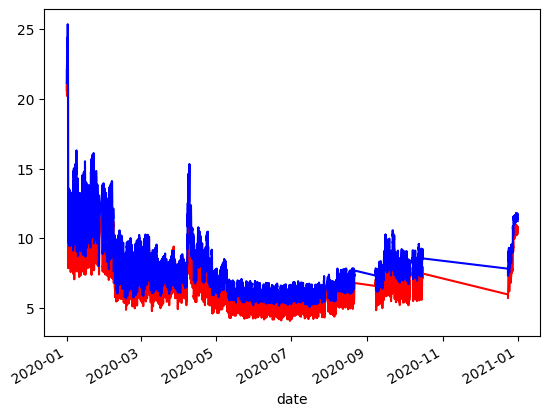

In [22]:
df_dew1['normalised'].plot(c='r')
df_dew2['normalised'].plot(c='b')

In [23]:
model_config={
    'time_budget': 30,  # Total running time in seconds
    'metric': 'rmse', #
}

In [24]:
df1a.columns

Index(['rowid', 'u10', 'v10', 't2m', 'tcc', 'sp', 'ssrd', 'rh2m', 'blh',
       'value', 'tp', 'd2m', 'date', 'date_unix', 'day_julian', 'weekday',
       'hour', 'set'],
      dtype='object')

In [25]:
df_dew, mod_stats=ad.do_all(df1,value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],model_config=model_config,n_samples=100)

2024-06-30 23:08:15 : Training AutoML...
2024-06-30 23:08:46 : Best model is xgboost with best model parameters of {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}
2024-06-30 23:08:46 : Normalising the dataset using the trained model in parallel.
2024-06-30 23:08:47 : Aggregating 100 predictions...


In [26]:
df_dew, mod_stats=ad.do_all(df1a,automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],model_config=model_config,n_samples=100)

2024-06-30 23:08:47 : Normalising the dataset using the trained model in parallel.
2024-06-30 23:08:49 : Aggregating 100 predictions...


In [27]:
df_dew, mod_stats=ad.do_all(df1a,automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],weather_df=weather_df,model_config=model_config,n_samples=100)

2024-06-30 23:08:49 : Normalising the dataset using the trained model in parallel.
2024-06-30 23:08:50 : Aggregating 100 predictions...


<Axes: xlabel='date'>

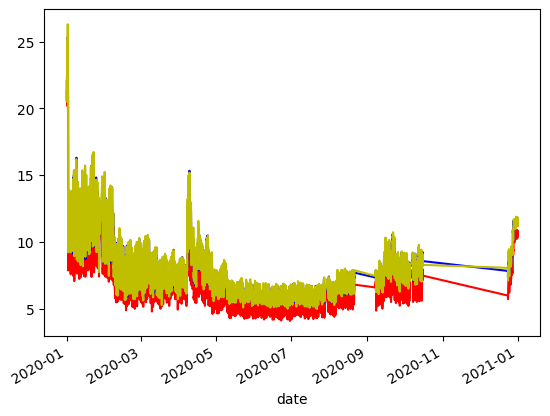

In [28]:
df_dew1['normalised'].plot(c='r')
df_dew2['normalised'].plot(c='b')
df_dew['normalised'].plot(c='y')

In [29]:
mod_stats

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_level,COE,IOA,R2,set
0,1593,0.912116,0.065145,1.948816,0.007081,0.211829,2.796755,0.936845,***,0.645061,0.822530,0.877679,testing
1,4780,0.971967,-0.013397,0.655479,-0.001470,0.071933,0.868739,0.994758,***,0.880270,0.940135,0.989543,training
2,6373,0.957006,0.006235,0.978762,0.000683,0.107153,1.587833,0.981282,***,0.821371,0.910685,0.962915,all


In [30]:
df_dew, mod_stats=ad.do_all_unc(df1,value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],n_samples=100,n_models=5)

2024-06-30 23:09:53 : Progress: 20.00% (Model 1/5)... ETA: 4.19 minutes
2024-06-30 23:11:17 : Progress: 40.00% (Model 2/5)... ETA: 3.66 minutes
2024-06-30 23:12:21 : Progress: 60.00% (Model 3/5)... ETA: 2.35 minutes
2024-06-30 23:13:31 : Progress: 80.00% (Model 4/5)... ETA: 1.17 minutes
2024-06-30 23:14:42 : Progress: 100.00% (Model 5/5)... ETA: 0.00 seconds


In [31]:
#Resampling from given dataset
df_dew, mod_stats=ad.do_all(df1,value='PM2.5',weather_df=df1.loc['2020-01-01':'2020-04-01',:],feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],model_config=model_config,n_samples=300)

2024-06-30 23:14:42 : Training AutoML...
2024-06-30 23:15:13 : Best model is xgboost with best model parameters of {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}
2024-06-30 23:15:13 : Normalising the dataset using the trained model in parallel.
2024-06-30 23:15:17 : Aggregating 300 predictions...


In [32]:
df_dew.head()

,observed,normalised
date,,
2020-01-01 00:00:00,58.1,22.036427
2020-01-01 01:00:00,43.2,20.604290
2020-01-01 02:00:00,43.0,20.541487
2020-01-01 03:00:00,42.8,20.982031
2020-01-01 04:00:00,36.8,20.209471


# Time series decomposition

In [33]:
df_dewca, mod_stats=ad.decom_emi(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], split_method = 'random', fraction=0.75, n_samples=300)

2024-06-30 23:15:17 : Training AutoML...
2024-06-30 23:16:17 : Best model is xgboost with best model parameters of {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}
2024-06-30 23:16:17 : Subtracting base...
2024-06-30 23:16:21 : Subtracting date_unix... ETA: 13.65 seconds
2024-06-30 23:16:24 : Subtracting day_julian... ETA: 9.89 seconds
2024-06-30 23:16:27 : Subtracting weekday... ETA: 6.50 seconds
2024-06-30 23:16:30 : Subtracting hour... ETA: 3.24 seconds


In [34]:
df_dewca

,observed,base,date_unix,day_julian,weekday,hour,deweathered,emi_noise
date,,,,,,,,
2020-01-01 00:00:00,58.1,9.818041,20.771057,1.522188,0.589029,-0.682137,22.864885,0.664746
2020-01-01 01:00:00,43.2,9.692105,21.108507,1.625845,0.505590,-0.538025,23.240728,0.538811
2020-01-01 02:00:00,43.0,8.911392,21.242676,1.750687,0.683084,-0.605843,22.828701,-0.241902
2020-01-01 03:00:00,42.8,8.811673,21.473623,1.746353,0.573212,-0.785749,22.665817,-0.341621
2020-01-01 04:00:00,36.8,8.689767,21.652887,1.853514,0.659945,-0.764317,22.938501,-0.463528
...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,8.585531,10.737784,1.087622,0.078158,0.046932,11.382733,-0.567763
2020-12-31 20:00:00,11.0,10.310694,9.930680,0.563858,0.074872,-0.047103,11.679707,1.157399
2020-12-31 21:00:00,15.3,8.988753,10.922729,1.009412,0.065480,-0.096726,11.736354,-0.164541


In [35]:
df_dewca, mod_stats=ad.decom_emi(df1a, model=automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300)

2024-06-30 23:16:34 : Subtracting base...
2024-06-30 23:16:37 : Subtracting date_unix... ETA: 13.72 seconds
2024-06-30 23:16:40 : Subtracting day_julian... ETA: 9.92 seconds
2024-06-30 23:16:43 : Subtracting weekday... ETA: 6.56 seconds
2024-06-30 23:16:47 : Subtracting hour... ETA: 3.25 seconds


In [36]:
df_dewcb, mod_stats=ad.decom_met(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300,fraction=0.75, seed=7654321, n_cores=-1)

2024-06-30 23:16:50 : Training AutoML...
2024-06-30 23:17:51 : Best model is xgboost with best model parameters of {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}
2024-06-30 23:17:51 : Subtracting deweathered...
2024-06-30 23:17:56 : Subtracting blh... ETA: 50.18 seconds
2024-06-30 23:18:00 : Subtracting u10... ETA: 37.31 seconds
2024-06-30 23:18:02 : Subtracting d2m... ETA: 29.96 seconds
2024-06-30 23:18:05 : Subtracting sp... ETA: 24.78 seconds
2024-06-30 23:18:08 : Subtracting v10... ETA: 20.35 seconds
2024-06-30 23:18:11 : Subtracting t2m... ETA: 16.24 seconds
2024-06-30 23:18:13 : Subtracting tp... ETA: 12.65 seconds
2024-06-30 23:18:16 : Subtracting tcc... ETA: 9.27 seconds
2024-06-30 23:18:18 : Subtracting ssrd... ETA: 6.05 second

In [37]:
df_dewcb, mod_stats=ad.decom_met(df1a, model=automl, feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300,fraction=0.75, seed=7654321, n_cores=-1)

2024-06-30 23:18:23 : Subtracting deweathered...
2024-06-30 23:18:26 : Subtracting blh... ETA: 32.43 seconds
2024-06-30 23:18:29 : Subtracting u10... ETA: 28.19 seconds
2024-06-30 23:18:32 : Subtracting d2m... ETA: 24.52 seconds
2024-06-30 23:18:35 : Subtracting sp... ETA: 21.18 seconds
2024-06-30 23:18:38 : Subtracting v10... ETA: 17.92 seconds
2024-06-30 23:18:41 : Subtracting t2m... ETA: 14.79 seconds
2024-06-30 23:18:44 : Subtracting tp... ETA: 11.75 seconds
2024-06-30 23:18:46 : Subtracting tcc... ETA: 8.71 seconds
2024-06-30 23:18:49 : Subtracting ssrd... ETA: 5.69 seconds
2024-06-30 23:18:51 : Subtracting rh2m... ETA: 2.79 seconds


In [38]:
df_dewcb

,observed,deweathered,blh,u10,d2m,sp,v10,t2m,tp,tcc,ssrd,rh2m,met_noise
date,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,22.901173,2.836161,15.604862,13.597719,3.097538,5.982426,5.102947,2.645569,1.733311,0.524025,0.259560,9.400610
2020-01-01 01:00:00,43.2,23.292109,1.189177,10.315523,9.936878,3.231026,5.699787,5.048077,3.011753,2.232758,1.198788,-0.278782,-0.640710
2020-01-01 02:00:00,43.0,22.924465,0.256285,6.793428,7.985607,3.230219,4.160391,4.614799,3.300400,2.702511,2.812454,1.370045,1.364532
2020-01-01 03:00:00,42.8,22.743603,-0.715023,5.472715,8.741560,3.530825,3.136000,4.742924,3.233292,2.642559,3.411346,1.673794,1.993581
2020-01-01 04:00:00,36.8,22.932659,-0.568703,1.299967,4.533781,3.709536,2.247259,3.566872,2.903542,2.241142,3.095699,1.866989,1.182835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,11.385867,-0.455450,-0.422625,0.134402,0.318190,0.356725,0.863954,0.775996,0.059834,0.022869,-0.232387,-0.272833
2020-12-31 20:00:00,11.0,11.653265,-0.537632,-0.469799,-0.017273,0.148226,0.303840,0.832024,0.794930,-0.417020,-0.411418,-0.174755,-0.571940
2020-12-31 21:00:00,15.3,11.793571,-0.544849,-0.665973,-0.125731,0.246484,0.315296,0.800159,0.788460,-0.482048,-0.444693,-0.044995,3.652803


In [39]:
df_dewca, mod_stats=ad.decom_emi(df1a, model=automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300)

2024-06-30 23:18:53 : Subtracting base...
2024-06-30 23:18:57 : Subtracting date_unix... ETA: 14.21 seconds
2024-06-30 23:19:00 : Subtracting day_julian... ETA: 10.18 seconds
2024-06-30 23:19:03 : Subtracting weekday... ETA: 6.77 seconds
2024-06-30 23:19:07 : Subtracting hour... ETA: 3.35 seconds


In [40]:
df_dewca

,observed,base,date_unix,day_julian,weekday,hour,deweathered,emi_noise
date,,,,,,,,
2020-01-01 00:00:00,58.1,9.880562,20.706322,1.522188,0.589029,-0.682137,22.864885,0.729482
2020-01-01 01:00:00,43.2,9.571011,21.227386,1.625845,0.505590,-0.538025,23.240728,0.419930
2020-01-01 02:00:00,43.0,8.984028,21.167824,1.750687,0.683084,-0.605843,22.828701,-0.167052
2020-01-01 03:00:00,42.8,8.725123,21.557959,1.746353,0.573212,-0.785749,22.665817,-0.425957
2020-01-01 04:00:00,36.8,8.668932,21.671509,1.853514,0.659945,-0.764317,22.938501,-0.482148
...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,8.524911,10.796190,1.087622,0.078158,0.046932,11.382733,-0.626169
2020-12-31 20:00:00,11.0,10.114060,10.125099,0.563858,0.074872,-0.047103,11.679707,0.962980
2020-12-31 21:00:00,15.3,9.016053,10.893215,1.009412,0.065480,-0.096726,11.736354,-0.135027


# Rolling weather normalisation

In [41]:
df_dewc1, mod_stats=ad.rolling_dew(df1a, automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], n_samples=100,window_days=14, rollingevery=7)

2024-06-30 23:19:10 : Rolling window 0 from 2020-01-01 to 2020-01-15
2024-06-30 23:19:14 : Rolling window 10 from 2020-03-13 to 2020-03-27 ETA: 10.16 seconds
2024-06-30 23:19:17 : Rolling window 20 from 2020-05-22 to 2020-06-05 ETA: 6.54 seconds
2024-06-30 23:19:21 : Rolling window 30 from 2020-08-02 to 2020-08-16 ETA: 3.12 seconds


In [42]:
df_dewc1.head()

,observed,rolling_0,rolling_1,rolling_2,rolling_3,rolling_4,rolling_5,rolling_6,rolling_7,rolling_8,...,rolling_29,rolling_30,rolling_31,rolling_32,rolling_33,rolling_34,rolling_35,rolling_36,rolling_37,rolling_38
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,16.387463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,43.2,17.699984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,43.0,16.876064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,42.8,17.117424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,36.8,17.708944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

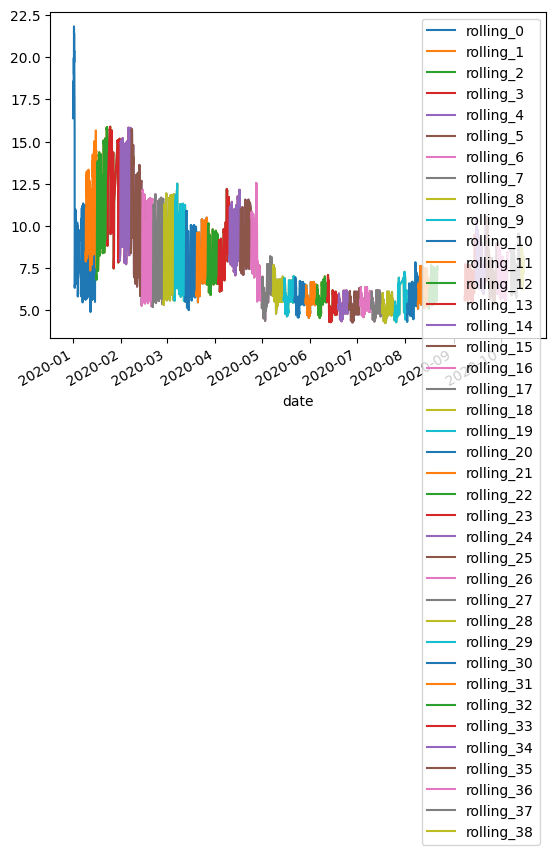

In [43]:
df_dewc1.iloc[:,1:].plot()

In [44]:
df_dewc2, mod_stats=ad.rolling_met(df1a, automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=100,window_days=14,rollingevery=7,fraction=0.75, seed=7654321, n_cores=-1)

2024-06-30 23:19:28 : Rolling window 0 from 2020-01-01 to 2020-01-15
2024-06-30 23:19:32 : Rolling window 10 from 2020-03-13 to 2020-03-27 ETA: 12.54 seconds
2024-06-30 23:19:36 : Rolling window 20 from 2020-05-22 to 2020-06-05 ETA: 8.06 seconds
2024-06-30 23:19:41 : Rolling window 30 from 2020-08-02 to 2020-08-16 ETA: 3.81 seconds


In [45]:
df_dewc2.head()

,observed,normalised,emi_mean_14,emi_std_14,met_short,met_season
date,,,,,,
2020-01-01 00:00:00,58.1,23.414051,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,43.2,23.385691,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,43.0,23.211742,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,42.8,22.295132,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,36.8,22.366114,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

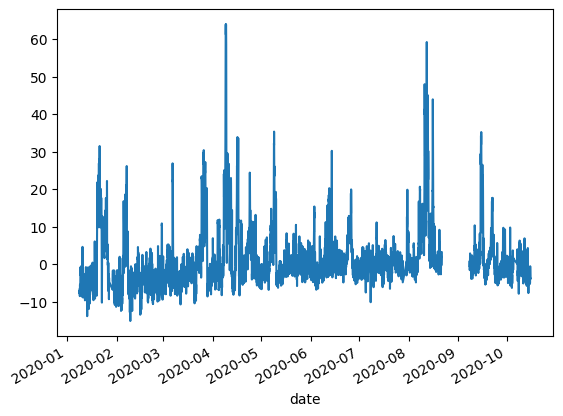

In [46]:
df_dewc2['met_short'].plot()

<Axes: xlabel='date'>

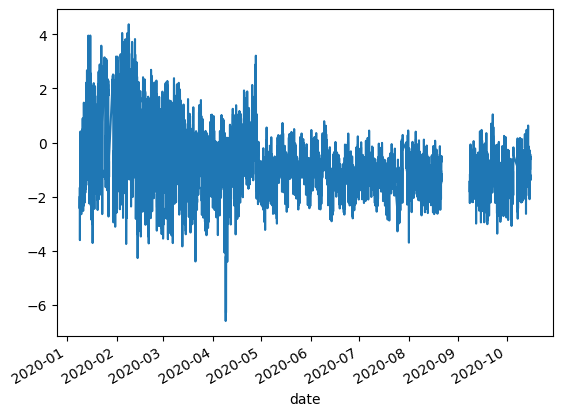

In [47]:
df_dewc2['met_season'].plot()

# Partial Dependence Plots

In [48]:
import normet.pdp as pdp

In [49]:
df1a=ad.prepare_data(df1, value='PM2.5', feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], split_method='random',  fraction=0.75, seed=7654321)

In [50]:
df1a

,rowid,u10,v10,t2m,tcc,sp,ssrd,rh2m,blh,value,tp,d2m,date,date_unix,day_julian,weekday,hour,set
0,0,-2.720528,1.545010,278.394725,0.650958,102252.303312,-1.164153e-10,91.884130,384.209053,58.1,0.000008,277.183465,2020-01-01 00:00:00,1.577837e+09,1,3,0,training
1,1,-2.308789,1.282742,277.772899,0.603699,102211.168636,-1.164153e-10,92.715877,353.220263,43.2,0.000002,276.695430,2020-01-01 01:00:00,1.577840e+09,1,3,1,training
2,2,-2.216471,0.758730,277.463419,0.710378,102174.855967,-1.164153e-10,93.485560,255.911846,43.0,0.000005,276.505662,2020-01-01 02:00:00,1.577844e+09,1,3,2,testing
3,3,-1.928623,0.509013,277.305813,0.837765,102166.786485,-1.164153e-10,93.906363,191.375560,42.8,0.000005,276.412816,2020-01-01 03:00:00,1.577848e+09,1,3,3,training
4,4,-1.700043,0.607069,277.478941,0.819103,102142.578039,-1.164153e-10,93.696878,151.780210,36.8,0.000003,276.553051,2020-01-01 04:00:00,1.577851e+09,1,3,4,testing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,6368,1.380939,-1.945195,273.557442,0.918149,99902.506413,-5.820766e-11,90.582979,476.945688,11.7,0.000000,272.197565,2020-12-31 19:00:00,1.609441e+09,366,4,19,training
6369,6369,0.987925,-2.102732,273.629146,0.839639,99947.625909,-5.820766e-11,89.939908,486.665851,11.0,0.000000,272.171041,2020-12-31 20:00:00,1.609445e+09,366,4,20,training
6370,6370,0.681543,-1.933668,273.470592,0.739354,100000.215520,-5.820766e-11,90.422188,489.355002,15.3,0.000000,272.087408,2020-12-31 21:00:00,1.609448e+09,366,4,21,testing
6371,6371,1.020793,-0.583816,272.926062,0.643753,100042.844978,-5.820766e-11,95.088677,40.714872,17.1,0.000000,272.235319,2020-12-31 22:00:00,1.609452e+09,366,4,22,training


In [51]:
all_features=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']
pdp_value=pdp.pdp_all(automl,df1a,feature_names=all_features)

In [52]:
pdp_value

,variable,value,pdp_mean,pdp_std
0,u10,-4.354032,10.963994,7.261466
1,u10,-4.242993,11.043289,7.309947
2,u10,-4.131954,11.042447,7.333392
3,u10,-4.020915,11.031183,7.338155
4,u10,-3.909875,11.040386,7.363017
...,...,...,...,...
1226,hour,19.000000,9.639515,7.460504
1227,hour,20.000000,9.578510,7.448645
1228,hour,21.000000,9.388046,7.372877
1229,hour,22.000000,9.182877,7.346088


In [53]:
pdp.pdp_plot(automl, df1a, feature_names=all_features,figsize=(8,9),hspace=0.4)

In [54]:
pdp.pdp_plot(automl, df1a, feature_names=all_features,variables=['ssrd','t2m'],kind='average',figsize=(6,4))

In [55]:
pdp.pdp_plot(automl, df1a, feature_names=all_features,variables=['ssrd','t2m'],kind='both',figsize=(6,4))

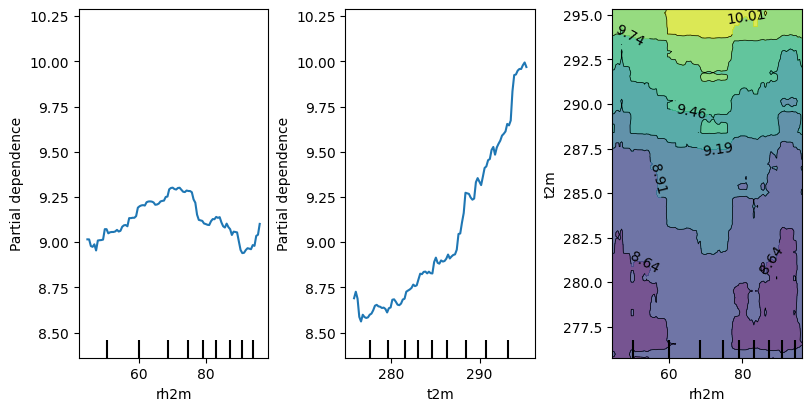

In [56]:
pdp.pdp_interaction(automl,df1a,variables=['rh2m','t2m',('rh2m','t2m')],kind='average',
                training_only=True,ncols=3,figsize=(8,4),constrained_layout=True)

# Change Points Detection

In [57]:
df_dewca.head()

,observed,base,date_unix,day_julian,weekday,hour,deweathered,emi_noise
date,,,,,,,,
2020-01-01 00:00:00,58.1,9.880562,20.706322,1.522188,0.589029,-0.682137,22.864885,0.729482
2020-01-01 01:00:00,43.2,9.571011,21.227386,1.625845,0.505590,-0.538025,23.240728,0.419930
2020-01-01 02:00:00,43.0,8.984028,21.167824,1.750687,0.683084,-0.605843,22.828701,-0.167052
2020-01-01 03:00:00,42.8,8.725123,21.557959,1.746353,0.573212,-0.785749,22.665817,-0.425957
2020-01-01 04:00:00,36.8,8.668932,21.671509,1.853514,0.659945,-0.764317,22.938501,-0.482148


In [58]:
import normet.cpd as cpd
import matplotlib.pyplot as plt

In [59]:
pt=cpd.cpd_rupture(df_dewca.resample('1D').mean(),'date_unix',window=14, n=5)

In [60]:
pt

DatetimeIndex(['2020-02-09', '2020-04-04', '2020-04-14', '2020-04-24',
               '2020-05-09'],
              dtype='datetime64[ns]', name='date', freq=None)

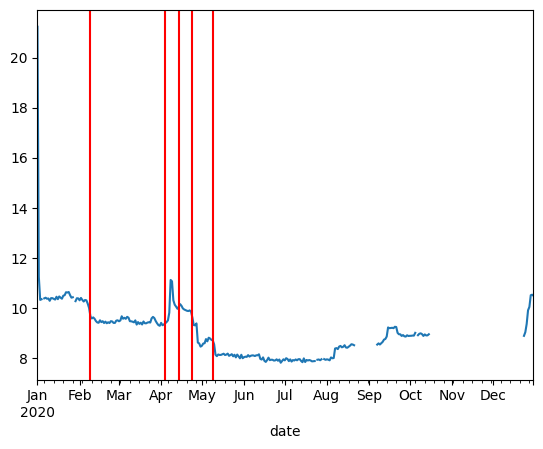

In [61]:
fig,ax=plt.subplots()
df_dewca['date_unix'].resample('1D').mean().plot()
for i in np.arange(len(pt)):
    ax.axvline(pt[i],c='r',label='ruptures')